In [4]:
import sys

from imp import reload
import time
from sklearn import metrics
import numpy as np
import csv
from sklearn import preprocessing

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc  ###计算roc和auc

from sklearn.preprocessing import Imputer
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
np.set_printoptions(suppress=True)
reload(sys)

<module 'sys' (built-in)>

In [5]:
# Random Forest Classifier
def random_forest_classifier(train_x, train_y):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=200)
    model.fit(train_x, train_y)
    return model

def get_low_important_feature(train_x, train_y):
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier(n_estimators=20)
    model.fit(train_x, train_y)
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    low_150_feature = indices[150:]

    return low_150_feature


# Decision Tree Classifier
def decision_tree_classifier(train_x, train_y):
    from sklearn import tree
    model = tree.DecisionTreeClassifier()
    model.fit(train_x, train_y)
    return model

def read_csv_data(data_file):
    csv_reader = csv.reader(open(data_file, encoding='utf-8'))
    # for row in csv_reader:
    #     print(row)
    # return [item for item in csv_reader]

    ignore_column = [0,86,87,88,169,170,193,217,218,219,220,221,222,279,281,282,283,284,285,286,288,289,290,291,292,293,\
                     294,296,299,310,313,314,315,316,317,318,319,320,321,339,340,341,342,343,346,347,348,353,354,355]
    data = []
    for item in csv_reader:
        valid_columns = []
        idx = 0;
        for column in item:
            # if idx in feature_cloumn:
            if idx not in ignore_column:
                valid_columns.append(column)
            idx += 1
        valid_columns.append(item[321])# lable index is 321
        data.append(valid_columns)
        # print(valid_columns)
    return data

def data_preprocessing(data):
    imp = Imputer(missing_values='NaN', strategy='mean', axis=0)  # data preprocessing for missing value
    imp.fit(data)
    return imp.transform(data)

## 加载训练集并进行预处理以及特征选择

In [6]:
print('reading training and testing data...')

data_csv_file = '/Users/sunshiding/Desktop/现金贷/train_data.csv'
csv_data = read_csv_data(data_csv_file)
sample_x, sample_y = [], []

train_p = 0
train_n = 0

data_number = 0


for *sample, label in csv_data[1:]:
    row_x = []
    for item in sample:
        if item == '':
            row_x.append(np.nan)
        else:
            row_x.append(float(item))
    sample_x.append(row_x)
    if label == '1':
        sample_y.append(1)
        train_p +=1
    else:
        sample_y.append(-1)
        train_n += 1

#data preprocessing for missing value
sample_x = data_preprocessing(sample_x)

sample_x = np.array(sample_x)
sample_y = np.array(sample_y)

train_x = sample_x
train_y = sample_y

#normalization
min_max_scaler = preprocessing.MinMaxScaler()
train_x = min_max_scaler.fit_transform(train_x)

# feature selection
low_150_rf = get_low_important_feature(train_x, train_y)
print("low_150_rf:\n",low_150_rf)
train_x = np.delete(train_x,low_150_rf,1)
print("train_x:\n",train_x)

reading training and testing data...


/Users/sunshiding/anaconda3/envs/environment3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


low_150_rf:
 [ 21 120 247   9 238   5  56  46 103  48  33  10  12  45 183  29 237   4
  19  28  26 175  55  15 165   1  58 212 246 273  57   7 190  18  14  54
 229  77 245 128 145 283 189 195 102 153 119 174  13 161  32  69 182 160
 137 118  25  53 127 258  17 100 228  99  97 236 152 109 111 126  16 101
 124 194 173  98 108 297 115 288 136 116 181 106  24 117 144 244 188 110
  96 125 151 204 107 143 158 123 150 299 148 133 147 135 172 281 155 134
 159 114 122 132 207 157 280 142 141 149 156 180 131 306 146 140 208 202
 210 154  95 205 209 139 289 282 211 130 279 301 138 298 277 187 179  94
 171  91 278 264 268 203 307  93 275 276 206  92 269  90 266 265]
train_x:
 [[0.9672712  0.03179191 0.02441151 ... 0.00002439 0.82608696 0.76863753]
 [0.96611377 0.03323699 0.01743679 ... 0.00001334 0.47826087 0.52956298]
 [0.96508666 0.11271676 0.06015693 ... 0.00006371 0.52173913 0.44730077]
 ...
 [0.96668527 0.00867052 0.01046207 ... 0.00001193 0.60869565 0.56812339]
 [0.96513006 0.02890173 0.0095

In [7]:
train_x.shape

(41441, 150)

## 加载测试集

In [8]:
data_csv_file_test = '/Users/sunshiding/Desktop/现金贷/test_data.csv'
csv_data_test = read_csv_data(data_csv_file_test)
sample_x_test, sample_y_test = [], []


test_n = 0
test_p = 0

for *sample, label in csv_data_test[1:]:
    row_x = []
    for item in sample:
        if item == '':
            row_x.append(np.nan)
        else:
            row_x.append(float(item))
    sample_x_test.append(row_x)
    if label == '1':
        sample_y_test.append(1)
        test_p += 1
    else:
        sample_y_test.append(-1)
        test_n += 1

sample_x_test = data_preprocessing(sample_x_test)

sample_x_test = np.array(sample_x_test)
sample_y_test = np.array(sample_y_test)

test_x = sample_x_test
test_y = sample_y_test

# test_x = pca.fit_transform(test_x)

test_x = np.delete(test_x, low_150_rf, 1)

min_max_scaler = preprocessing.MinMaxScaler()
test_x = min_max_scaler.fit_transform(test_x)

print("************data distribution***************")
print('#train_n: %d, #train_p: %d, test_n: %d, test_p: %d' % (train_n, train_p, test_n,test_p))

num_train, num_feat = train_x.shape
num_test, num_feat = test_x.shape
print('******************** Data Info *********************')
print('#training data: %d, #testing_data: %d, dimension: %d' % (num_train, num_test, num_feat))

************data distribution***************
#train_n: 28368, #train_p: 13073, test_n: 7016, test_p: 3356
******************** Data Info *********************
#training data: 41441, #testing_data: 10372, dimension: 150


## 训练决策树

In [9]:
start_time = time.time()
model = decision_tree_classifier(train_x, train_y)
print('training took %fs!' % (time.time() - start_time))
predict = model.predict(test_x)
print(predict)

precision = metrics.precision_score(test_y, predict)
recall = metrics.recall_score(test_y, predict)
test_auc = metrics.roc_auc_score(test_y, predict)
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predict))
print('AUC:%.2f, precision: %.2f%%, recall: %.2f%%' % (test_auc,100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(test_y, predict)
print('accuracy: %.2f%%' % (100 * accuracy))

training took 6.834323s!
[ 1  1  1 ... -1 -1  1]
Confusion matrix:
[[2652 4364]
 [ 935 2421]]
AUC:0.55, precision: 35.68%, recall: 72.14%
accuracy: 48.91%


<Figure size 432x288 with 0 Axes>

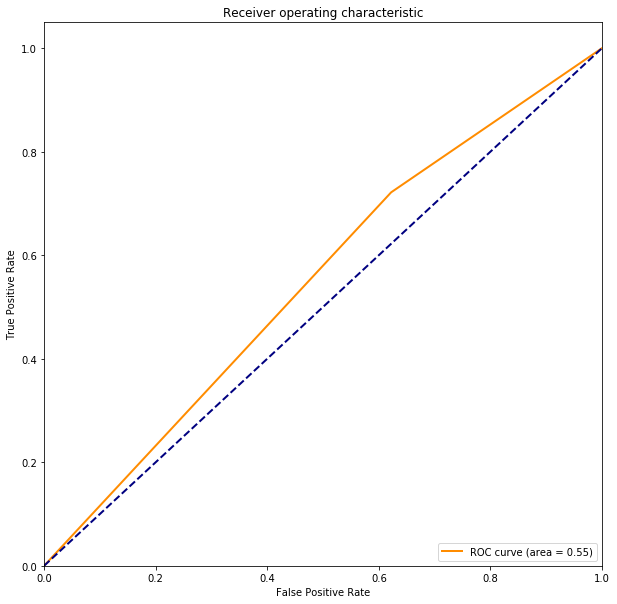

In [10]:
# Compute ROC curve and ROC area for each class
y_score = model.predict_proba(test_x)
fpr, tpr, threshold = roc_curve(test_y, y_score[:,1])  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值

plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

## 训练随机森林

In [11]:
start_time = time.time()
model = random_forest_classifier(train_x, train_y)
print('training took %fs!' % (time.time() - start_time))
predict = model.predict(test_x)
predict_proba = model.predict_proba(test_x)
print(predict)

precision = metrics.precision_score(test_y, predict)
recall = metrics.recall_score(test_y, predict)
test_auc = metrics.roc_auc_score(test_y, predict_proba[:,1])
print("Confusion matrix:\n%s" % metrics.confusion_matrix(test_y, predict))
print('AUC:%.2f, precision: %.2f%%, recall: %.2f%%' % (test_auc,100 * precision, 100 * recall))
accuracy = metrics.accuracy_score(test_y, predict)
print('accuracy: %.2f%%' % (100 * accuracy))

training took 72.362843s!
[ 1  1  1 ... -1 -1 -1]
Confusion matrix:
[[6705  311]
 [2618  738]]
AUC:0.73, precision: 70.35%, recall: 21.99%
accuracy: 71.76%


In [12]:
print(classification_report(test_y, predict))

             precision    recall  f1-score   support

         -1       0.72      0.96      0.82      7016
          1       0.70      0.22      0.34      3356

avg / total       0.71      0.72      0.66     10372



[[0.2   0.8  ]
 [0.2   0.8  ]
 [0.17  0.83 ]
 ...
 [0.625 0.375]
 [0.73  0.27 ]
 [0.635 0.365]]
0.731621375728286


<Figure size 432x288 with 0 Axes>

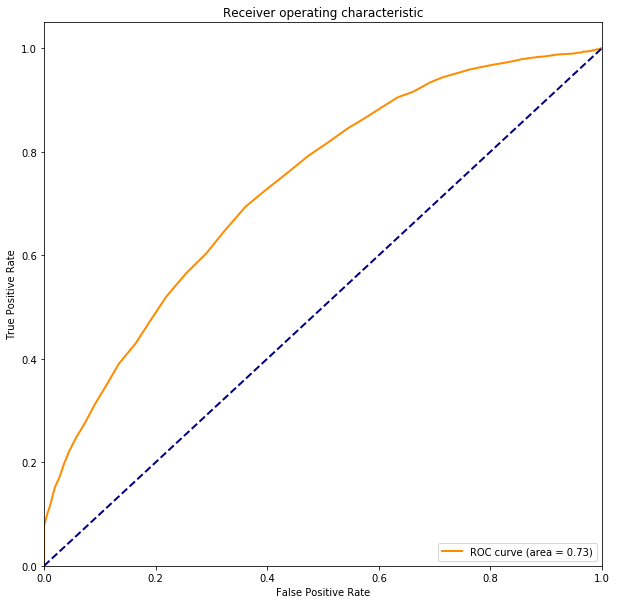

In [13]:
y_score = model.predict_proba(test_x)
print(y_score)
fpr, tpr, threshold = roc_curve(test_y, y_score[:,1])  ###计算真正率和假正率
roc_auc = auc(fpr, tpr)  ###计算auc的值
print(roc_auc)
plt.figure()
lw = 2
plt.figure(figsize=(10, 10))
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)  ###假正率为横坐标，真正率为纵坐标做曲线
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()